In [1]:
import numpy as np
#import gcsfs
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
#gcsfs.__version__, xr.__version__

import iris
#iris.FUTURE.netcdf_promote = True
#iris.FUTURE.netcdf_no_unlimited = True
import iris.quickplot as qplt
import iris.plot as iplt
#from iris.experimental.equalise_cubes import equalise_attributes #OUTDATED
from iris.util import equalise_attributes

import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)
warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
warnings.filterwarnings('ignore', category=FutureWarning, append=True)

In [2]:
import matplotlib.ticker
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy
proj = ccrs.Mollweide()

from matplotlib import gridspec
#import matplotlib.gridspec as gridspec
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib.ticker import FormatStrFormatter


In [3]:
from scipy.signal import savgol_filter
from scipy import stats
import pandas as pd


In [19]:
# Define a helper function to convert Iris cube coordinates to numpy arrays
def cube_to_arrays(cube, dim1, dim2):
    # Extract the two dimensions
    dim1_data = cube.coord(dim1).points
    dim2_data = cube.coord(dim2).points
    
    # Create a meshgrid for contour plotting
    X, Y = np.meshgrid(dim1_data, dim2_data)
    Z = cube.data
    return X, Y, Z

In [78]:
#CMIP7 
#prescribed volcanic AOD, source: Tom Aubry (t.aubry@exeter.ac.uk)
from iris import load, Constraint
fname = "/archive/Shipeng.Zhang/work/CMIP7_volc/strat_aer_opt_prop_input4MIPs_type_CMIP6Plus_source_id_grid_label_1750-2023.nc"

ds = iris.load(fname)

In [5]:
print(ds)

0: Scattering Asymmtery Factor / (unknown) (Wavelength: 23; altitude: 70; latitude: 36; Month from January 1750: 3288)
1: Single Scattering Albedo / (unknown) (Wavelength: 23; altitude: 70; latitude: 36; Month from January 1750: 3288)
2: Effective Radius / (unknown)        (altitude: 70; latitude: 36; Month from January 1750: 3288)
3: Volume Density / (unknown)          (altitude: 70; latitude: 36; Month from January 1750: 3288)
4: Stratospheric Aerosol Optical Depth / (unknown) (Wavelength: 23; latitude: 36; Month from January 1750: 3288)
5: Extinction / (unknown)              (Wavelength: 23; altitude: 70; latitude: 36; Month from January 1750: 3288)
6: Data source: 1=from CMIP7 volcanic sulfur emission using aerosol model, 3=GloSSAC, 2=mix of 1 and 3 / (unknown) (Month from January 1750: 3288)
7: Surface Area Density / (unknown)    (altitude: 70; latitude: 36; Month from January 1750: 3288)
8: Global mean stratospheric Aerosol Optical Depth at 550 nm / (unknown) (Month from January 

In [180]:
print(ds[0].coord('Month from January 1750').points)
print(ds[0].coord('Wavelength').points)
print(ds[0].coord('altitude').points)
print(ds[0].coord('latitude').points)

[1.000e+00 2.000e+00 3.000e+00 ... 3.286e+03 3.287e+03 3.288e+03]
[ 0.1    0.2    0.3    0.4    0.525  0.55   0.6    0.7    0.8    0.9
  1.     1.02   1.1    1.2    1.3    1.4    2.     3.     4.     5.
 10.    20.    50.   ]
[ 5.   5.5  6.   6.5  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5
 12.  12.5 13.  13.5 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5
 19.  19.5 20.  20.5 21.  21.5 22.  22.5 23.  23.5 24.  24.5 25.  25.5
 26.  26.5 27.  27.5 28.  28.5 29.  29.5 30.  30.5 31.  31.5 32.  32.5
 33.  33.5 34.  34.5 35.  35.5 36.  36.5 37.  37.5 38.  38.5 39.  39.5]
[-87.5 -82.5 -77.5 -72.5 -67.5 -62.5 -57.5 -52.5 -47.5 -42.5 -37.5 -32.5
 -27.5 -22.5 -17.5 -12.5  -7.5  -2.5   2.5   7.5  12.5  17.5  22.5  27.5
  32.5  37.5  42.5  47.5  52.5  57.5  62.5  67.5  72.5  77.5  82.5  87.5]


In [182]:
print(ds0[0].coord('altitude').points)
print(ds0)

[ 5.   5.5  6.   6.5  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5
 12.  12.5 13.  13.5 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5
 19.  19.5 20.  20.5 21.  21.5 22.  22.5 23.  23.5 24.  24.5 25.  25.5
 26.  26.5 27.  27.5 28.  28.5 29.  29.5 30.  30.5 31.  31.5 32.  32.5
 33.  33.5 34.  34.5 35.  35.5 36.  36.5 37.  37.5 38.  38.5 39.  39.5]
0: ext_sun / (unknown)                 (-- : 18; latitude: 36; altitude: 70; month: 1980)
1: wl1_sun / (unknown)                 (-- : 18)
2: omega_sun / (unknown)               (-- : 18; latitude: 36; altitude: 70; month: 1980)
3: wl1_earth / (unknown)               (-- : 12)
4: wl2_earth / (unknown)               (-- : 12)
5: omega_earth / (unknown)             (-- : 12; latitude: 36; altitude: 70; month: 1980)
6: g_earth / (unknown)                 (-- : 12; latitude: 36; altitude: 70; month: 1980)
7: wl2_sun / (unknown)                 (-- : 18)
8: g_sun / (unknown)                   (-- : 18; latitude: 36; altitude: 70; month: 1980

In [9]:
time_points = ds[0].coord('Month from January 1750').points
# Assuming time_points is an array of months starting from 0 for January 1750
start_date = datetime(1750, 1, 1)

# Create a list of dates for each time point
dates = [start_date + relativedelta(months=int(month)) for month in time_points]


Text(0.5, 1.0, 'Global mean stratospheric Aerosol Optical Depth at 550 nm')

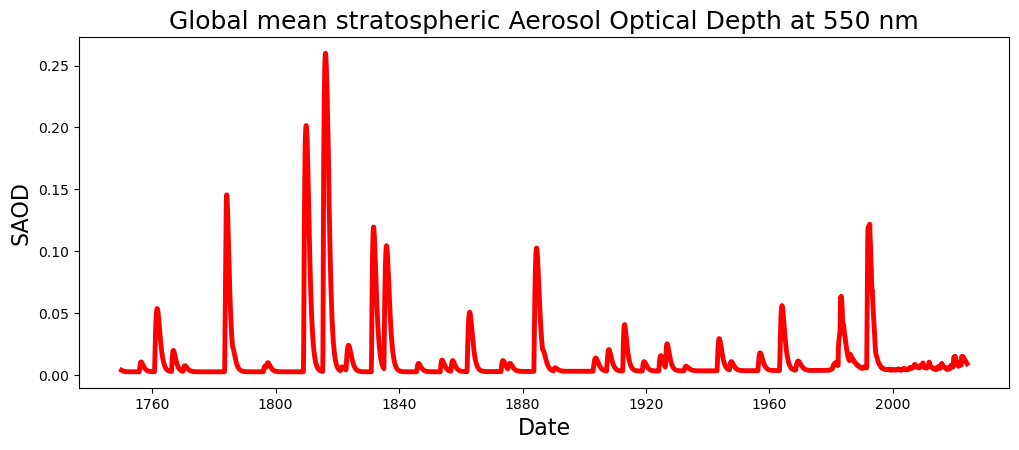

In [16]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

fig = plt.figure(figsize=(12, 12), dpi=100)
gs = gridspec.GridSpec(5, 2)

ax = fig.add_subplot(gs[0:2,:])


ax.plot(dates, ds[8].data, 'r', linewidth=3.5)  # Use dates here

ax.set_ylabel('SAOD', fontsize=16)
ax.set_xlabel('Date', fontsize=16)
ax.set_title('Global mean stratospheric Aerosol Optical Depth at 550 nm', fontsize=18)



In [17]:
print(ds[0].coord('Wavelength').points[5]) 
#550nm

0.55


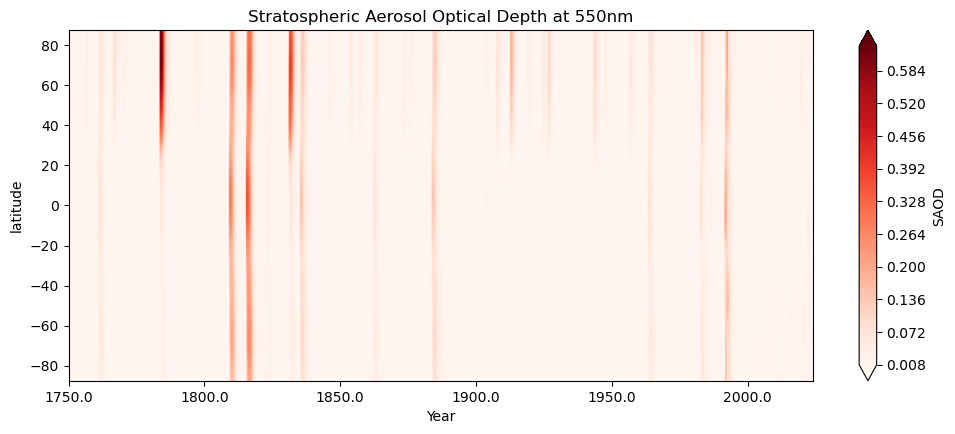

In [40]:
#4:Stratospheric Aerosol Optical Depth 
fig = plt.figure(figsize=(12, 12), dpi=100)
gs = gridspec.GridSpec(5, 2)

ax = fig.add_subplot(gs[0:2,:])

cube_time_lat = ds[4][5].copy()

# Assuming cube_to_arrays is a function you have defined to transform your cube data
# into arrays that can be easily plotted with plt.contourf
X, Y, Z = cube_to_arrays(cube_time_lat, 'Month from January 1750', 'latitude')  # Ensure the correct coord names are used

# Define the levels of the contour to be from -5 to 5, with a step that suits your data resolution (e.g., 0.5)
#levels = np.arange(-5, 5, 0.5)  # Adjust the step as needed for your specific data
contour_levels = np.linspace(-4e-10,4e-10,100)

# Use the 'coolwarm' colormap, which transitions from blue to red
# And specify the levels in the contourf call to control the contour range
contour = plt.contourf(X, Y, Z, 100, cmap="Reds", extend='both')  # Transpose Z to align dimensions

# Get current axes
ax = plt.gca()

# Set x-ticks
ax.set_xticks(time_points[::120*5])  # Every 12 months; adjust the slicing as needed
ax.set_xticklabels(1750+(time_points[::120*5]-1)/12)  # 

#ax.set_ylim([1, 300])

plt.title('Stratospheric Aerosol Optical Depth at 550nm')
plt.xlabel('Year')
plt.ylabel('latitude')
cbb1=plt.colorbar(contour, label='SAOD')
#cbb1.set_ticks(np.linspace(-4e-10,4e-10,5))

# Optionally, customize the x-axis to display specific years or other time formats
# This part is commented out but can be adjusted based on your specific needs
#plt.show()


In [ ]:
ds_collapsed_level = ds.collapsed('Full pressure level', iris.analysis.SUM)
ds_collapsed_lon_level = ds_collapsed_level.collapsed('longitude', iris.analysis.SUM)


In [61]:
# Define a custom aggregator using numpy's nanmean function
def nanmean_function(data, axis):
    return np.nanmean(data, axis=axis)

nanmean_aggregator = iris.analysis.Aggregator(
    'nanmean',
    nanmean_function,
    units_func=lambda units: units
)

# Define a custom aggregator using numpy's nansum function
def nansum_function(data, axis):
    return np.nansum(data, axis=axis)

nansum_aggregator = iris.analysis.Aggregator(
    'nansum',
    nansum_function,
    units_func=lambda units: units
)

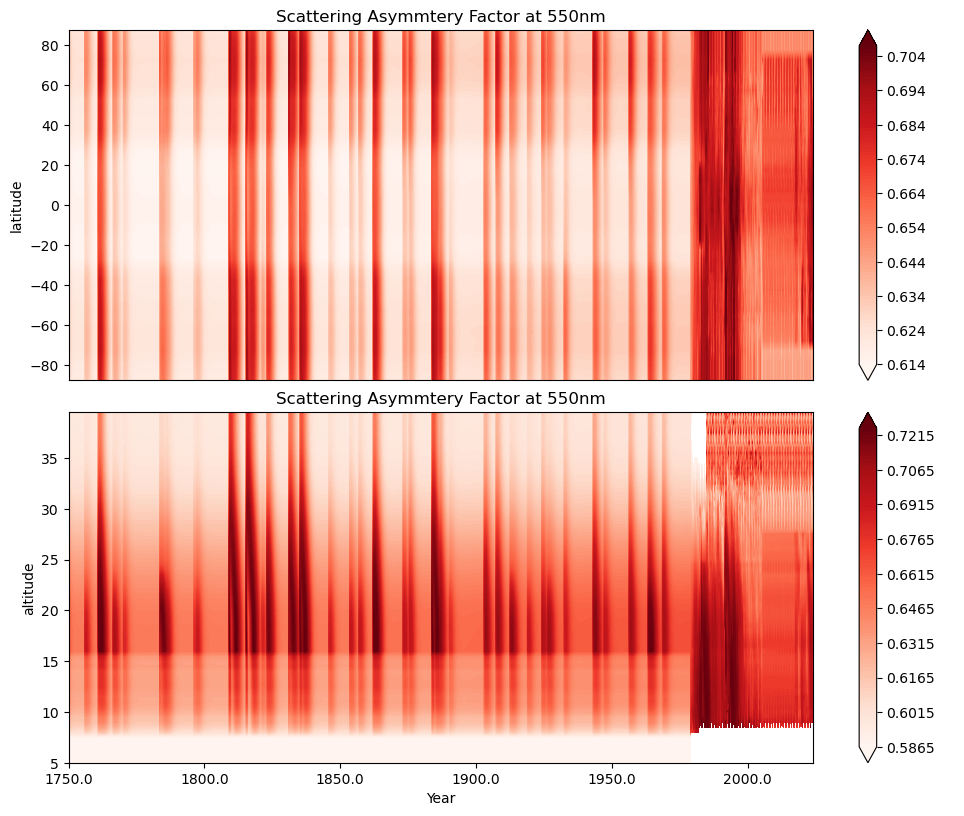

In [52]:
#0: Scattering Asymmtery Factor
#0: Scattering Asymmtery Factor / (unknown) 
#(Wavelength: 23; altitude: 70; latitude: 36; Month from January 1750: 3288)

var_name = 'Scattering Asymmtery Factor'
unit_name = ' '

fig = plt.figure(figsize=(12, 12), dpi=100)
gs = gridspec.GridSpec(5, 2)

ax = fig.add_subplot(gs[0:2,:])

cube_time_lat = ds[0][5].copy().collapsed('altitude', nanmean_aggregator)

# Assuming cube_to_arrays is a function you have defined to transform your cube data
# into arrays that can be easily plotted with plt.contourf
X, Y, Z = cube_to_arrays(cube_time_lat, 'Month from January 1750', 'latitude')  # Ensure the correct coord names are used

# Define the levels of the contour to be from -5 to 5, with a step that suits your data resolution (e.g., 0.5)
#levels = np.arange(-5, 5, 0.5)  # Adjust the step as needed for your specific data
contour_levels = np.linspace(-4e-10,4e-10,100)

# Use the 'coolwarm' colormap, which transitions from blue to red
# And specify the levels in the contourf call to control the contour range
contour = plt.contourf(X, Y, Z, 100, cmap="Reds", extend='both')  # Transpose Z to align dimensions

# Get current axes
ax = plt.gca()

# Set x-ticks
#ax.set_xticks(time_points[::120*5])  # Every 12 months; adjust the slicing as needed
#ax.set_xticklabels(1750+(time_points[::120*5]-1)/12)  # 
# Set no x-ticks
ax.set_xticks([])  # This will not display any x-ticks

#ax.set_ylim([1, 300])

plt.title(var_name+' at 550nm')
#plt.xlabel('Year')
plt.ylabel('latitude')
cbb1=plt.colorbar(contour, label=unit_name)
#cbb1.set_ticks(np.linspace(-4e-10,4e-10,5))


ax = fig.add_subplot(gs[2:4,:])

cube_time_alt = ds[0][5].copy().collapsed('latitude', nanmean_aggregator)


# Assuming cube_to_arrays is a function you have defined to transform your cube data
# into arrays that can be easily plotted with plt.contourf
X, Y, Z = cube_to_arrays(cube_time_alt, 'Month from January 1750', 'altitude')  # Ensure the correct coord names are used

# Define the levels of the contour to be from -5 to 5, with a step that suits your data resolution (e.g., 0.5)
#levels = np.arange(-5, 5, 0.5)  # Adjust the step as needed for your specific data
contour_levels = np.linspace(-4e-10,4e-10,100)

# Use the 'coolwarm' colormap, which transitions from blue to red
# And specify the levels in the contourf call to control the contour range
contour = plt.contourf(X, Y, Z, 100, cmap="Reds", extend='both')  # Transpose Z to align dimensions

# Get current axes
ax = plt.gca()

# Set x-ticks
ax.set_xticks(time_points[::120*5])  # Every 12 months; adjust the slicing as needed
ax.set_xticklabels(1750+(time_points[::120*5]-1)/12)  # 

#ax.set_ylim([1, 300])
# Invert the y-axis to have the pressure levels displayed correctly
#plt.gca().invert_yaxis()

plt.title(var_name+' at 550nm')
plt.xlabel('Year')
plt.ylabel('altitude')
cbb1=plt.colorbar(contour, label=unit_name)
#cbb1.set_ticks(np.linspace(-4e-10,4e-10,5))


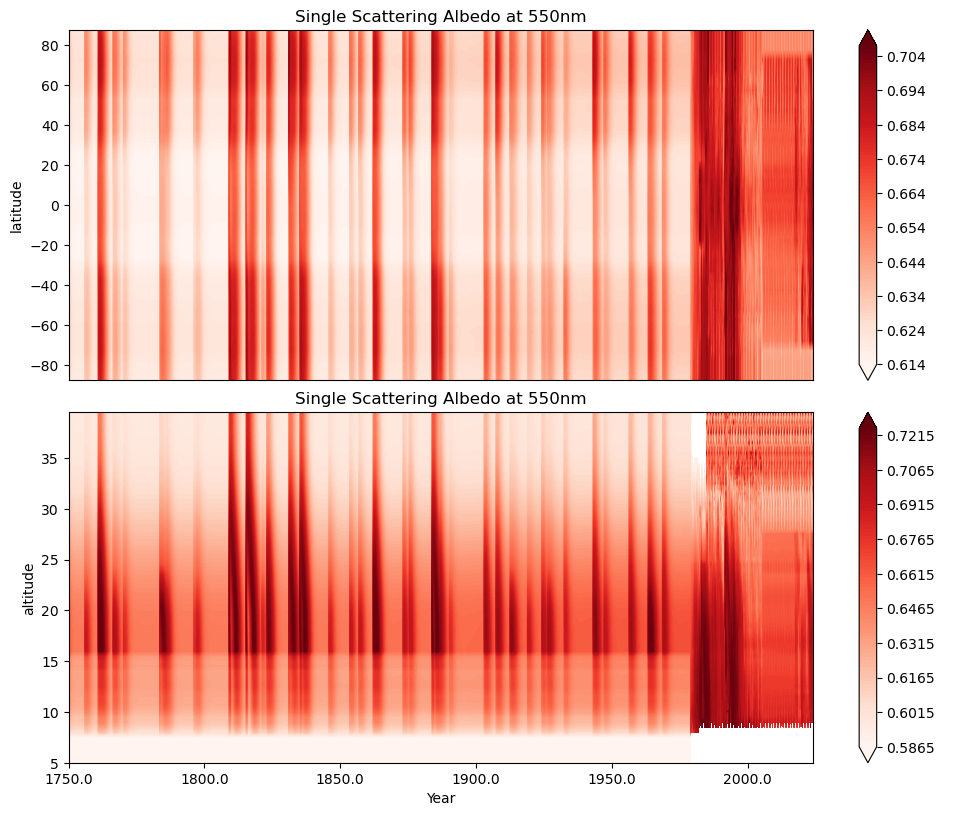

In [53]:
#1: Single Scattering Albedo / (unknown) 
#(Wavelength: 23; altitude: 70; latitude: 36; Month from January 1750: 3288)

var_name = 'Single Scattering Albedo'
unit_name = ' '

fig = plt.figure(figsize=(12, 12), dpi=100)
gs = gridspec.GridSpec(5, 2)

ax = fig.add_subplot(gs[0:2,:])

cube_time_lat = ds[1][5].copy().collapsed('altitude', nanmean_aggregator)

# Assuming cube_to_arrays is a function you have defined to transform your cube data
# into arrays that can be easily plotted with plt.contourf
X, Y, Z = cube_to_arrays(cube_time_lat, 'Month from January 1750', 'latitude')  # Ensure the correct coord names are used

# Define the levels of the contour to be from -5 to 5, with a step that suits your data resolution (e.g., 0.5)
#levels = np.arange(-5, 5, 0.5)  # Adjust the step as needed for your specific data
contour_levels = np.linspace(-4e-10,4e-10,100)

# Use the 'coolwarm' colormap, which transitions from blue to red
# And specify the levels in the contourf call to control the contour range
contour = plt.contourf(X, Y, Z, 100, cmap="Reds", extend='both')  # Transpose Z to align dimensions

# Get current axes
ax = plt.gca()

# Set x-ticks
#ax.set_xticks(time_points[::120*5])  # Every 12 months; adjust the slicing as needed
#ax.set_xticklabels(1750+(time_points[::120*5]-1)/12)  # 
# Set no x-ticks
ax.set_xticks([])  # This will not display any x-ticks

#ax.set_ylim([1, 300])

plt.title(var_name+' at 550nm')
#plt.xlabel('Year')
plt.ylabel('latitude')
cbb1=plt.colorbar(contour, label=unit_name)
#cbb1.set_ticks(np.linspace(-4e-10,4e-10,5))


ax = fig.add_subplot(gs[2:4,:])

cube_time_alt = ds[1][5].copy().collapsed('latitude', nanmean_aggregator)

# Assuming cube_to_arrays is a function you have defined to transform your cube data
# into arrays that can be easily plotted with plt.contourf
X, Y, Z = cube_to_arrays(cube_time_alt, 'Month from January 1750', 'altitude')  # Ensure the correct coord names are used

# Define the levels of the contour to be from -5 to 5, with a step that suits your data resolution (e.g., 0.5)
#levels = np.arange(-5, 5, 0.5)  # Adjust the step as needed for your specific data
contour_levels = np.linspace(-4e-10,4e-10,100)

# Use the 'coolwarm' colormap, which transitions from blue to red
# And specify the levels in the contourf call to control the contour range
contour = plt.contourf(X, Y, Z, 100, cmap="Reds", extend='both')  # Transpose Z to align dimensions

# Get current axes
ax = plt.gca()

# Set x-ticks
ax.set_xticks(time_points[::120*5])  # Every 12 months; adjust the slicing as needed
ax.set_xticklabels(1750+(time_points[::120*5]-1)/12)  # 

#ax.set_ylim([1, 300])
# Invert the y-axis to have the pressure levels displayed correctly
#plt.gca().invert_yaxis()

plt.title(var_name+' at 550nm')
plt.xlabel('Year')
plt.ylabel('altitude')
cbb1=plt.colorbar(contour, label=unit_name)
#cbb1.set_ticks(np.linspace(-4e-10,4e-10,5))


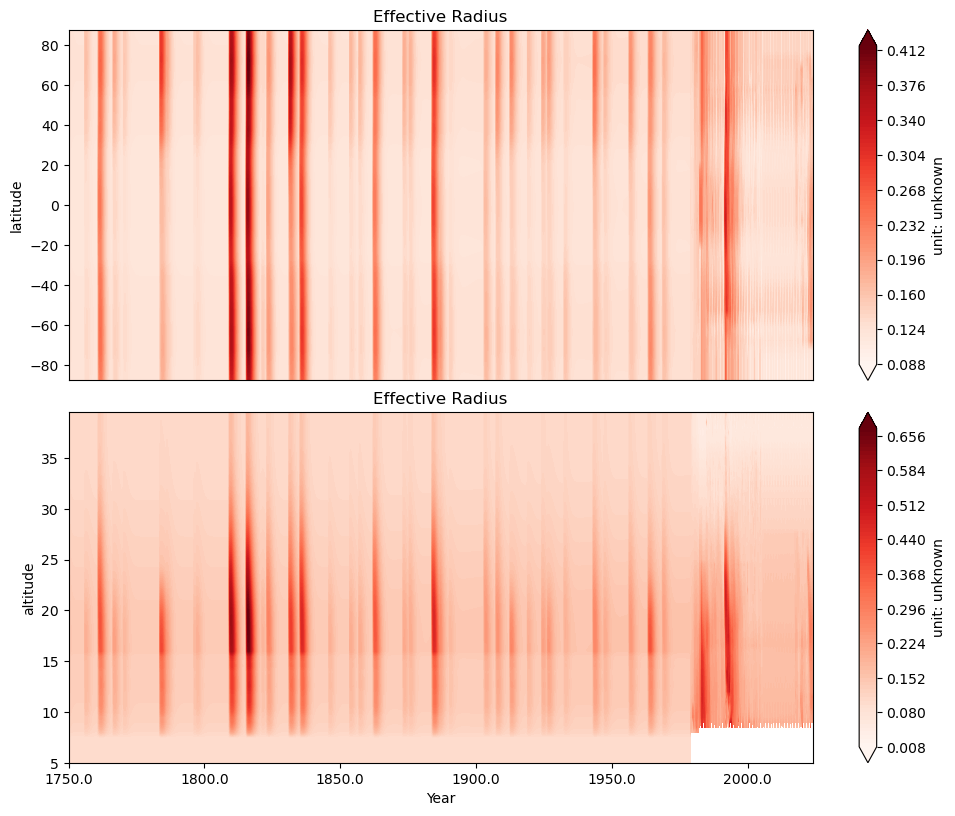

In [55]:
#2: Effective Radius / (unknown)        
#(altitude: 70; latitude: 36; Month from January 1750: 3288)
var_name = 'Effective Radius'
unit_name = 'unknown'

fig = plt.figure(figsize=(12, 12), dpi=100)
gs = gridspec.GridSpec(5, 2)

ax = fig.add_subplot(gs[0:2,:])

cube_time_lat = ds[2].copy().collapsed('altitude', nanmean_aggregator)

# Assuming cube_to_arrays is a function you have defined to transform your cube data
# into arrays that can be easily plotted with plt.contourf
X, Y, Z = cube_to_arrays(cube_time_lat, 'Month from January 1750', 'latitude')  # Ensure the correct coord names are used

# Define the levels of the contour to be from -5 to 5, with a step that suits your data resolution (e.g., 0.5)
#levels = np.arange(-5, 5, 0.5)  # Adjust the step as needed for your specific data
contour_levels = np.linspace(-4e-10,4e-10,100)

# Use the 'coolwarm' colormap, which transitions from blue to red
# And specify the levels in the contourf call to control the contour range
contour = plt.contourf(X, Y, Z, 100, cmap="Reds", extend='both')  # Transpose Z to align dimensions

# Get current axes
ax = plt.gca()

# Set x-ticks
#ax.set_xticks(time_points[::120*5])  # Every 12 months; adjust the slicing as needed
#ax.set_xticklabels(1750+(time_points[::120*5]-1)/12)  # 
# Set no x-ticks
ax.set_xticks([])  # This will not display any x-ticks

#ax.set_ylim([1, 300])

plt.title(var_name)
#plt.xlabel('Year')
plt.ylabel('latitude')
cbb1=plt.colorbar(contour, label='unit: '+unit_name)
#cbb1.set_ticks(np.linspace(-4e-10,4e-10,5))


ax = fig.add_subplot(gs[2:4,:])

cube_time_alt = ds[2].copy().collapsed('latitude', nanmean_aggregator)

# Assuming cube_to_arrays is a function you have defined to transform your cube data
# into arrays that can be easily plotted with plt.contourf
X, Y, Z = cube_to_arrays(cube_time_alt, 'Month from January 1750', 'altitude')  # Ensure the correct coord names are used

# Define the levels of the contour to be from -5 to 5, with a step that suits your data resolution (e.g., 0.5)
#levels = np.arange(-5, 5, 0.5)  # Adjust the step as needed for your specific data
contour_levels = np.linspace(-4e-10,4e-10,100)

# Use the 'coolwarm' colormap, which transitions from blue to red
# And specify the levels in the contourf call to control the contour range
contour = plt.contourf(X, Y, Z, 100, cmap="Reds", extend='both')  # Transpose Z to align dimensions

# Get current axes
ax = plt.gca()

# Set x-ticks
ax.set_xticks(time_points[::120*5])  # Every 12 months; adjust the slicing as needed
ax.set_xticklabels(1750+(time_points[::120*5]-1)/12)  # 

#ax.set_ylim([1, 300])
# Invert the y-axis to have the pressure levels displayed correctly
#plt.gca().invert_yaxis()

plt.title(var_name)
plt.xlabel('Year')
plt.ylabel('altitude')
cbb1=plt.colorbar(contour, label='unit: '+unit_name)
#cbb1.set_ticks(np.linspace(-4e-10,4e-10,5))


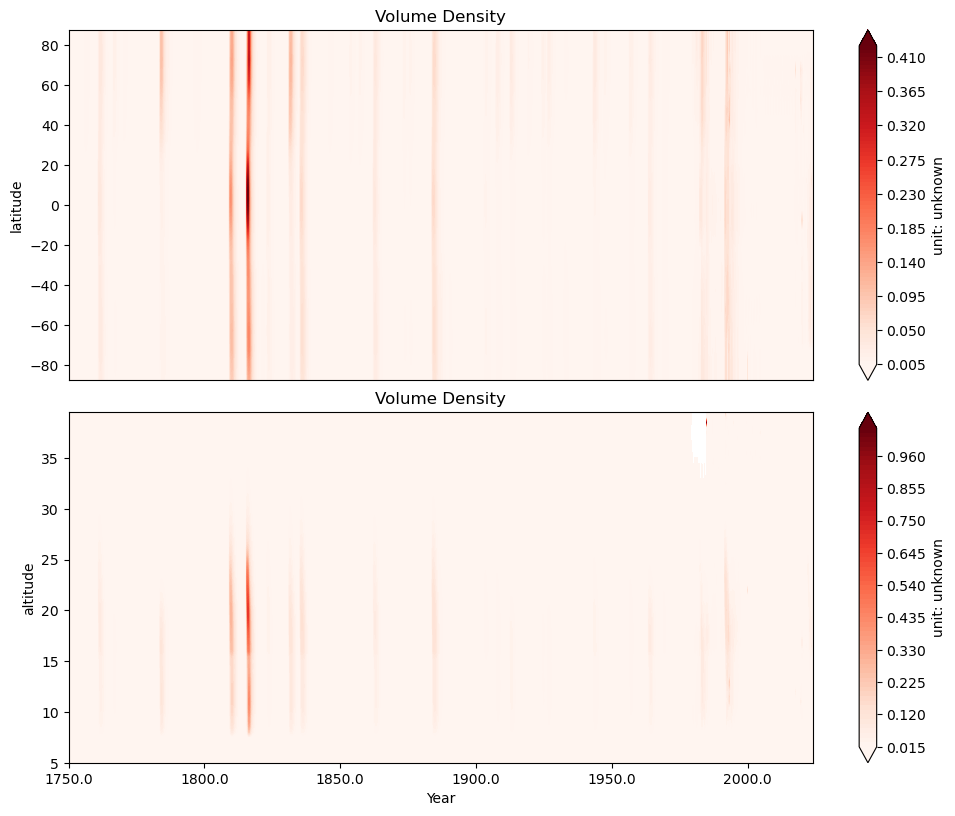

In [57]:
#3: Volume Density / (unknown)          
#(altitude: 70; latitude: 36; Month from January 1750: 3288)
var_name = 'Volume Density'
unit_name = 'unknown'

fig = plt.figure(figsize=(12, 12), dpi=100)
gs = gridspec.GridSpec(5, 2)

ax = fig.add_subplot(gs[0:2,:])

cube_time_lat = ds[3].copy().collapsed('altitude', nanmean_aggregator)

# Assuming cube_to_arrays is a function you have defined to transform your cube data
# into arrays that can be easily plotted with plt.contourf
X, Y, Z = cube_to_arrays(cube_time_lat, 'Month from January 1750', 'latitude')  # Ensure the correct coord names are used

# Define the levels of the contour to be from -5 to 5, with a step that suits your data resolution (e.g., 0.5)
#levels = np.arange(-5, 5, 0.5)  # Adjust the step as needed for your specific data
contour_levels = np.linspace(-4e-10,4e-10,100)

# Use the 'coolwarm' colormap, which transitions from blue to red
# And specify the levels in the contourf call to control the contour range
contour = plt.contourf(X, Y, Z, 100, cmap="Reds", extend='both')  # Transpose Z to align dimensions

# Get current axes
ax = plt.gca()

# Set x-ticks
#ax.set_xticks(time_points[::120*5])  # Every 12 months; adjust the slicing as needed
#ax.set_xticklabels(1750+(time_points[::120*5]-1)/12)  # 
# Set no x-ticks
ax.set_xticks([])  # This will not display any x-ticks

#ax.set_ylim([1, 300])

plt.title(var_name)
#plt.xlabel('Year')
plt.ylabel('latitude')
cbb1=plt.colorbar(contour, label='unit: '+unit_name)
#cbb1.set_ticks(np.linspace(-4e-10,4e-10,5))


ax = fig.add_subplot(gs[2:4,:])

cube_time_alt = ds[3].copy().collapsed('latitude', nanmean_aggregator)

# Assuming cube_to_arrays is a function you have defined to transform your cube data
# into arrays that can be easily plotted with plt.contourf
X, Y, Z = cube_to_arrays(cube_time_alt, 'Month from January 1750', 'altitude')  # Ensure the correct coord names are used

# Define the levels of the contour to be from -5 to 5, with a step that suits your data resolution (e.g., 0.5)
#levels = np.arange(-5, 5, 0.5)  # Adjust the step as needed for your specific data
contour_levels = np.linspace(-4e-10,4e-10,100)

# Use the 'coolwarm' colormap, which transitions from blue to red
# And specify the levels in the contourf call to control the contour range
contour = plt.contourf(X, Y, Z, 100, cmap="Reds", extend='both')  # Transpose Z to align dimensions

# Get current axes
ax = plt.gca()

# Set x-ticks
ax.set_xticks(time_points[::120*5])  # Every 12 months; adjust the slicing as needed
ax.set_xticklabels(1750+(time_points[::120*5]-1)/12)  # 

#ax.set_ylim([1, 300])
# Invert the y-axis to have the pressure levels displayed correctly
#plt.gca().invert_yaxis()

plt.title(var_name)
plt.xlabel('Year')
plt.ylabel('altitude')
cbb1=plt.colorbar(contour, label='unit: '+unit_name)
#cbb1.set_ticks(np.linspace(-4e-10,4e-10,5))


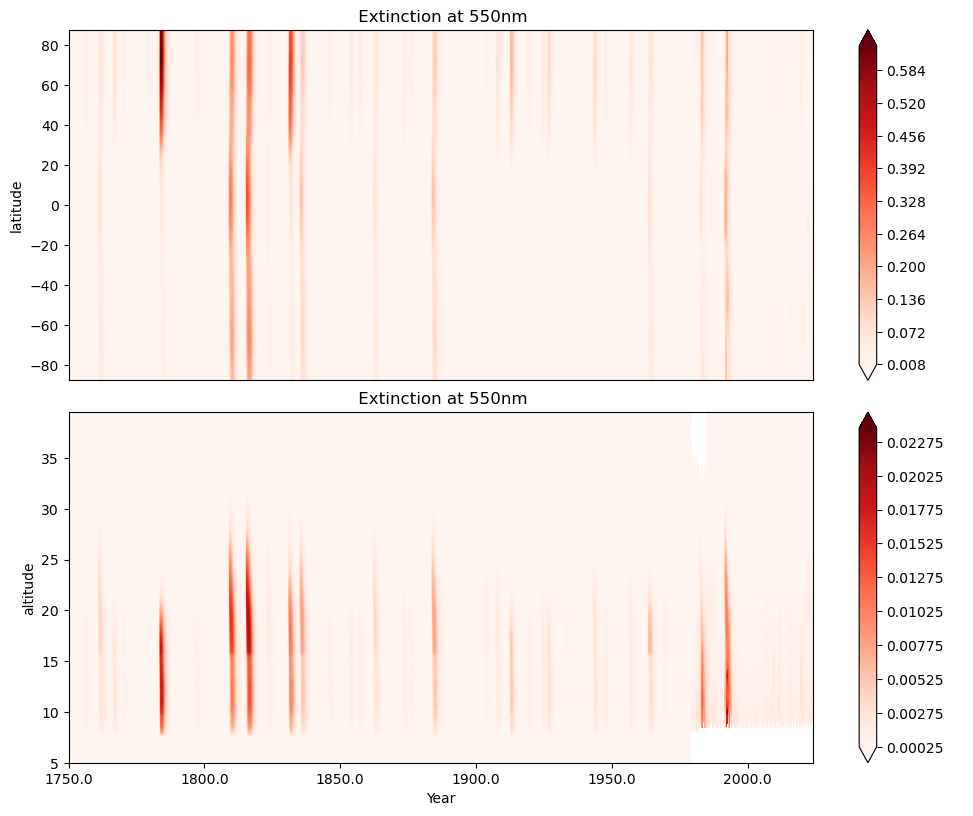

In [186]:
#5: Extinction / (unknown)              
#(Wavelength: 23; altitude: 70; latitude: 36; Month from January 1750: 3288)

var_name = ' Extinction'
unit_name = ' '

fig = plt.figure(figsize=(12, 12), dpi=100)
gs = gridspec.GridSpec(5, 2)

ax = fig.add_subplot(gs[0:2,:])

cube_time_lat = ds[5][5].copy().collapsed('altitude', nansum_aggregator)
cube_time_lat = 0.5 * cube_time_lat # each layer has 0.5km deepth


# Assuming cube_to_arrays is a function you have defined to transform your cube data
# into arrays that can be easily plotted with plt.contourf
X, Y, Z = cube_to_arrays(cube_time_lat, 'Month from January 1750', 'latitude')  # Ensure the correct coord names are used

# Define the levels of the contour to be from -5 to 5, with a step that suits your data resolution (e.g., 0.5)
#levels = np.arange(-5, 5, 0.5)  # Adjust the step as needed for your specific data
contour_levels = np.linspace(-4e-10,4e-10,100)

# Use the 'coolwarm' colormap, which transitions from blue to red
# And specify the levels in the contourf call to control the contour range
contour = plt.contourf(X, Y, Z, 100, cmap="Reds", extend='both')  # Transpose Z to align dimensions

# Get current axes
ax = plt.gca()

# Set x-ticks
#ax.set_xticks(time_points[::120*5])  # Every 12 months; adjust the slicing as needed
#ax.set_xticklabels(1750+(time_points[::120*5]-1)/12)  # 
# Set no x-ticks
ax.set_xticks([])  # This will not display any x-ticks

#ax.set_ylim([1, 300])

plt.title(var_name+' at 550nm')
#plt.xlabel('Year')
plt.ylabel('latitude')
cbb1=plt.colorbar(contour, label=unit_name)
#cbb1.set_ticks(np.linspace(-4e-10,4e-10,5))


ax = fig.add_subplot(gs[2:4,:])

cube_time_alt = ds[5][5].copy().collapsed('latitude', nanmean_aggregator)

# Assuming cube_to_arrays is a function you have defined to transform your cube data
# into arrays that can be easily plotted with plt.contourf
X, Y, Z = cube_to_arrays(cube_time_alt, 'Month from January 1750', 'altitude')  # Ensure the correct coord names are used

# Define the levels of the contour to be from -5 to 5, with a step that suits your data resolution (e.g., 0.5)
#levels = np.arange(-5, 5, 0.5)  # Adjust the step as needed for your specific data
contour_levels = np.linspace(-4e-10,4e-10,100)

# Use the 'coolwarm' colormap, which transitions from blue to red
# And specify the levels in the contourf call to control the contour range
contour = plt.contourf(X, Y, Z, 100, cmap="Reds", extend='both')  # Transpose Z to align dimensions

# Get current axes
ax = plt.gca()

# Set x-ticks
ax.set_xticks(time_points[::120*5])  # Every 12 months; adjust the slicing as needed
ax.set_xticklabels(1750+(time_points[::120*5]-1)/12)  # 

#ax.set_ylim([1, 300])
# Invert the y-axis to have the pressure levels displayed correctly
#plt.gca().invert_yaxis()

plt.title(var_name+' at 550nm')
plt.xlabel('Year')
plt.ylabel('altitude')
cbb1=plt.colorbar(contour, label=unit_name)
#cbb1.set_ticks(np.linspace(-4e-10,4e-10,5))



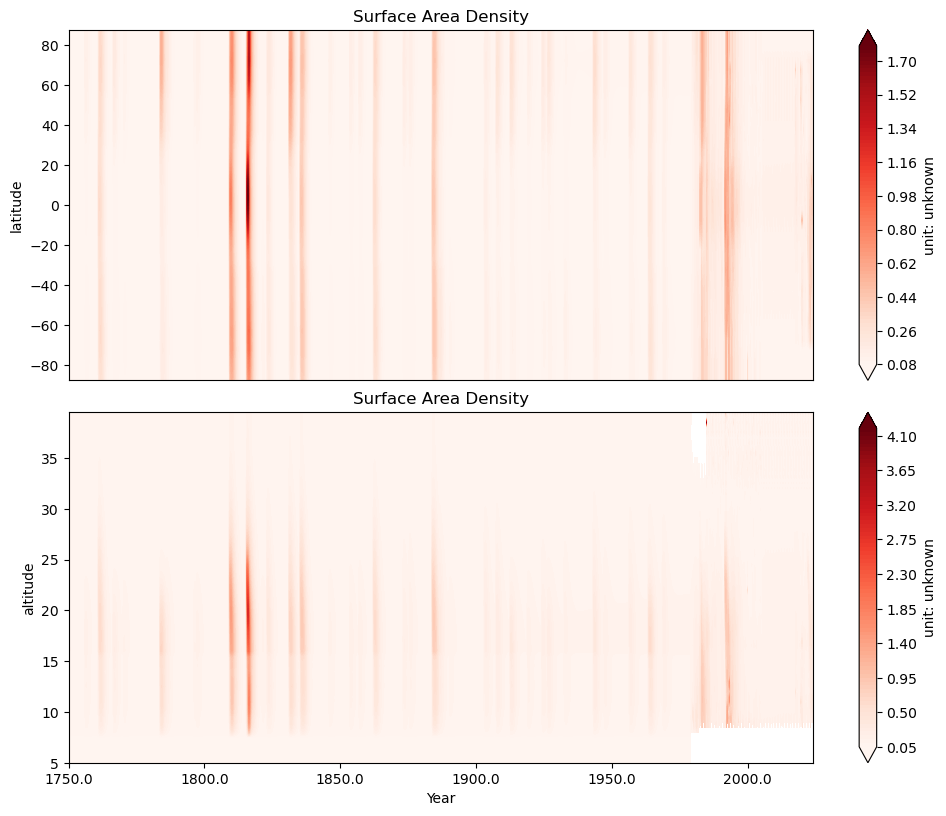

In [64]:
#7: Surface Area Density / (unknown)    
#(altitude: 70; latitude: 36; Month from January 1750: 3288)
var_name = 'Surface Area Density'
unit_name = 'unknown'

fig = plt.figure(figsize=(12, 12), dpi=100)
gs = gridspec.GridSpec(5, 2)

ax = fig.add_subplot(gs[0:2,:])

cube_time_lat = ds[7].copy().collapsed('altitude', nanmean_aggregator)

# Assuming cube_to_arrays is a function you have defined to transform your cube data
# into arrays that can be easily plotted with plt.contourf
X, Y, Z = cube_to_arrays(cube_time_lat, 'Month from January 1750', 'latitude')  # Ensure the correct coord names are used

# Define the levels of the contour to be from -5 to 5, with a step that suits your data resolution (e.g., 0.5)
#levels = np.arange(-5, 5, 0.5)  # Adjust the step as needed for your specific data
contour_levels = np.linspace(-4e-10,4e-10,100)

# Use the 'coolwarm' colormap, which transitions from blue to red
# And specify the levels in the contourf call to control the contour range
contour = plt.contourf(X, Y, Z, 100, cmap="Reds", extend='both')  # Transpose Z to align dimensions

# Get current axes
ax = plt.gca()

# Set x-ticks
#ax.set_xticks(time_points[::120*5])  # Every 12 months; adjust the slicing as needed
#ax.set_xticklabels(1750+(time_points[::120*5]-1)/12)  # 
# Set no x-ticks
ax.set_xticks([])  # This will not display any x-ticks

#ax.set_ylim([1, 300])

plt.title(var_name)
#plt.xlabel('Year')
plt.ylabel('latitude')
cbb1=plt.colorbar(contour, label='unit: '+unit_name)
#cbb1.set_ticks(np.linspace(-4e-10,4e-10,5))


ax = fig.add_subplot(gs[2:4,:])

cube_time_alt = ds[7].copy().collapsed('latitude', nanmean_aggregator)

# Assuming cube_to_arrays is a function you have defined to transform your cube data
# into arrays that can be easily plotted with plt.contourf
X, Y, Z = cube_to_arrays(cube_time_alt, 'Month from January 1750', 'altitude')  # Ensure the correct coord names are used

# Define the levels of the contour to be from -5 to 5, with a step that suits your data resolution (e.g., 0.5)
#levels = np.arange(-5, 5, 0.5)  # Adjust the step as needed for your specific data
contour_levels = np.linspace(-4e-10,4e-10,100)

# Use the 'coolwarm' colormap, which transitions from blue to red
# And specify the levels in the contourf call to control the contour range
contour = plt.contourf(X, Y, Z, 100, cmap="Reds", extend='both')  # Transpose Z to align dimensions

# Get current axes
ax = plt.gca()

# Set x-ticks
ax.set_xticks(time_points[::120*5])  # Every 12 months; adjust the slicing as needed
ax.set_xticklabels(1750+(time_points[::120*5]-1)/12)  # 

#ax.set_ylim([1, 300])
# Invert the y-axis to have the pressure levels displayed correctly
#plt.gca().invert_yaxis()

plt.title(var_name)
plt.xlabel('Year')
plt.ylabel('altitude')
cbb1=plt.colorbar(contour, label='unit: '+unit_name)
#cbb1.set_ticks(np.linspace(-4e-10,4e-10,5))


In [70]:
# CMIP6 
# prescribed SAOD
from iris import load, Constraint
fname = "/archive/djp/Volcano/CMIP_GFDL_radiation_v2.nc"
ds0 = iris.load(fname)

In [71]:
print(ds0)

0: ext_sun / (unknown)                 (-- : 18; latitude: 36; altitude: 70; month: 1980)
1: wl1_sun / (unknown)                 (-- : 18)
2: omega_sun / (unknown)               (-- : 18; latitude: 36; altitude: 70; month: 1980)
3: wl1_earth / (unknown)               (-- : 12)
4: wl2_earth / (unknown)               (-- : 12)
5: omega_earth / (unknown)             (-- : 12; latitude: 36; altitude: 70; month: 1980)
6: g_earth / (unknown)                 (-- : 12; latitude: 36; altitude: 70; month: 1980)
7: wl2_sun / (unknown)                 (-- : 18)
8: g_sun / (unknown)                   (-- : 18; latitude: 36; altitude: 70; month: 1980)
9: ext_earth / (unknown)               (-- : 12; latitude: 36; altitude: 70; month: 1980)


In [72]:
import iris.analysis.cartography
import metpy.calc as mpcalc
from metpy.units import units

def pressure_to_height(pressure):
    """Convert pressure in hPa to altitude in meters using MetPy."""
    pressure = pressure * units.hPa
    height = mpcalc.pressure_to_height_std(pressure)
    return height.magnitude  # Return the height as a plain numpy array


def cal_aod(extsw):
    # Assuming extsw_gfdl is already your loaded cube and the pressure coord has bounds
    extsw.coord('pressure').convert_units('hPa')  # ensure pressure units are hPa
    # Calculate the pressure layer thickness if bounds are available
    if not extsw.coord('pressure').has_bounds():
        extsw.coord('pressure').guess_bounds()

    pressure = extsw.coord('pressure').points
        
    # Ensure that pressure is in descending order (surface to TOA)
    if pressure[0] < pressure[-1]:
        extsw = iris.util.reverse(extsw, 'pressure')
        
    height_diff = np.diff(1000*pressure_to_height(extsw.coord('pressure').bounds), axis=1).squeeze()

    # Create a new cube for layer thickness to broadcast against extsw_gfdl
    # You need to create a cube that has the same dimensions as extsw_gfdl except for longitude and time, which are scalar.
    thickness_cube = iris.util.broadcast_to_shape(height_diff, extsw.shape, (1,))

    # The multiplication should now be broadcast correctly
    extinction_per_layer =  extsw * thickness_cube

    # Now integrate over the 'pressure' dimension to get the total AOD
    aod_cube = extinction_per_layer.collapsed('pressure', iris.analysis.SUM)

    # This will result in a cube with dimensions of time, latitude, and longitude
    # where each value is the integrated extinction coefficient, or AOD.
    return aod_cube


    

In [73]:
extsw_550nm = ds0[0][7] #8th band for 550nm in ext_sun
print(extsw_550nm)

ext_sun / (unknown)                 (latitude: 36; altitude: 70; month: 1980)
    Dimension coordinates:
        latitude                             x             -          -
        altitude                             -             x          -
        month                                -             -          x
    Attributes:
        Conventions                 'CF-1.6'
        Institution                 'Institute for Atmosphere and Climate, ETH Zurich, Switzerland'
        Institution_id              'IACETH'
        activity_id                 'input4CMIPs'
        comment                     'We take only the sulfuric acid aerosol into account. The          PSCs ...'
        contact                     'Beiping Luo: beiping.luo@env.ethz.ch or Larry Thomason:         l.w.th ...'
        creation_date               '20160531'
        data_structure              'grid'
        frequency                   'month'
        further_info_url            'ftp://iacftp.ethz.ch/pub_r

In [91]:
print(extsw_550nm.coord('month'))

print(extsw_550nm.coord('altitude'))
print(extsw_550nm.coord('altitude').points)

DimCoord :  month / (unknown)
    points: [1.000e+00, 2.000e+00, ..., 1.979e+03, 1.980e+03]
    shape: (1980,)
    dtype: float32
    var_name: 'month'
    attributes:
        invalid_units  'month starting from 1850 01'
DimCoord :  altitude / (km)
    points: [ 5. ,  5.5, ..., 39. , 39.5]
    shape: (70,)
    dtype: float32
    standard_name: 'altitude'
    var_name: 'altitude'
[ 5.   5.5  6.   6.5  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5
 12.  12.5 13.  13.5 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5
 19.  19.5 20.  20.5 21.  21.5 22.  22.5 23.  23.5 24.  24.5 25.  25.5
 26.  26.5 27.  27.5 28.  28.5 29.  29.5 30.  30.5 31.  31.5 32.  32.5
 33.  33.5 34.  34.5 35.  35.5 36.  36.5 37.  37.5 38.  38.5 39.  39.5]


### basically the altitude is increasing at every 0.5km

In [76]:
aod550nm = extsw_550nm * 0.5
aod550nm = aod550nm.collapsed('altitude', iris.analysis.SUM)

In [92]:
time_points_cmip6 = aod550nm.coord('month').points
# Assuming time_points is an array of months starting from 0 for January 1750
start_date_cmip6 = datetime(1850, 1, 1)

# Create a list of dates for each time point
dates_cmip6 = [start_date_cmip6 + relativedelta(months=int(month)) for month in time_points_cmip6]

In [128]:
print(aod550nm)

unknown / (unknown)                 (latitude: 36; month: 1980)
    Dimension coordinates:
        latitude                             x          -
        month                                -          x
    Scalar coordinates:
        altitude                    22.25 km, bound=(5.0, 39.5) km
    Cell methods:
        0                           altitude: sum
    Attributes:
        Conventions                 'CF-1.6'
        Institution                 'Institute for Atmosphere and Climate, ETH Zurich, Switzerland'
        Institution_id              'IACETH'
        activity_id                 'input4CMIPs'
        comment                     'We take only the sulfuric acid aerosol into account. The          PSCs ...'
        contact                     'Beiping Luo: beiping.luo@env.ethz.ch or Larry Thomason:         l.w.th ...'
        creation_date               '20160531'
        data_structure              'grid'
        frequency                   'month'
        further_in

In [83]:
latitude = aod550nm.coord('latitude')
latitude_weights = np.cos(np.deg2rad(latitude.points))
latitude_weights /= latitude_weights.sum()  # Normalize weights

# Ensuring weights array matches the number of latitude points in the cube
weights = iris.util.broadcast_to_shape(latitude_weights, aod550nm.shape, (0,))


In [84]:
aod550nm_glb = aod550nm.collapsed('latitude', iris.analysis.MEAN, weights=weights)


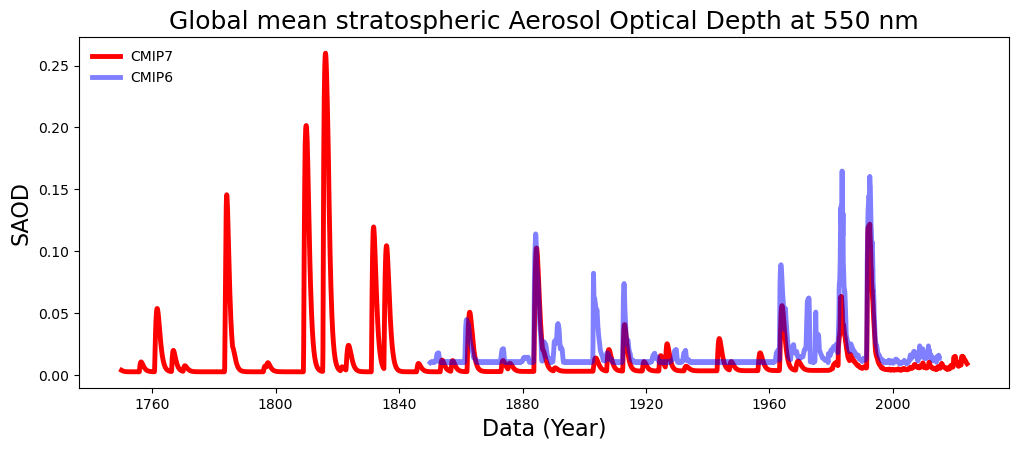

In [96]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

fig = plt.figure(figsize=(12, 12), dpi=100)
gs = gridspec.GridSpec(5, 2)

ax = fig.add_subplot(gs[0:2,:])


ax.plot(dates, ds[8].data, 'r', linewidth=3.5)  # Use dates here
ax.plot(dates_cmip6, aod550nm_glb.data, 'b',alpha=0.5, linewidth=3.5)  # Use dates here

ax.set_ylabel('SAOD', fontsize=16)
ax.set_xlabel('Data (Year)', fontsize=16)
ax.set_title('Global mean stratospheric Aerosol Optical Depth at 550 nm', fontsize=18)

plt.legend(['CMIP7','CMIP6'],loc='upper left', frameon=False)

In [103]:
print(dates[1200])
print(dates_cmip6[0])
print(1200+len(dates_cmip6)-1)
print(dates[1200+len(dates_cmip6)-1])
print(dates_cmip6[-1])


1850-02-01 00:00:00
1850-02-01 00:00:00
3179
2015-01-01 00:00:00
2015-01-01 00:00:00


In [109]:
print(dates[1200:3180])

[datetime.datetime(1850, 2, 1, 0, 0), datetime.datetime(1850, 3, 1, 0, 0), datetime.datetime(1850, 4, 1, 0, 0), datetime.datetime(1850, 5, 1, 0, 0), datetime.datetime(1850, 6, 1, 0, 0), datetime.datetime(1850, 7, 1, 0, 0), datetime.datetime(1850, 8, 1, 0, 0), datetime.datetime(1850, 9, 1, 0, 0), datetime.datetime(1850, 10, 1, 0, 0), datetime.datetime(1850, 11, 1, 0, 0), datetime.datetime(1850, 12, 1, 0, 0), datetime.datetime(1851, 1, 1, 0, 0), datetime.datetime(1851, 2, 1, 0, 0), datetime.datetime(1851, 3, 1, 0, 0), datetime.datetime(1851, 4, 1, 0, 0), datetime.datetime(1851, 5, 1, 0, 0), datetime.datetime(1851, 6, 1, 0, 0), datetime.datetime(1851, 7, 1, 0, 0), datetime.datetime(1851, 8, 1, 0, 0), datetime.datetime(1851, 9, 1, 0, 0), datetime.datetime(1851, 10, 1, 0, 0), datetime.datetime(1851, 11, 1, 0, 0), datetime.datetime(1851, 12, 1, 0, 0), datetime.datetime(1852, 1, 1, 0, 0), datetime.datetime(1852, 2, 1, 0, 0), datetime.datetime(1852, 3, 1, 0, 0), datetime.datetime(1852, 4, 1, 0

In [108]:
print(dates_cmip6[:])

[datetime.datetime(1850, 2, 1, 0, 0), datetime.datetime(1850, 3, 1, 0, 0), datetime.datetime(1850, 4, 1, 0, 0), datetime.datetime(1850, 5, 1, 0, 0), datetime.datetime(1850, 6, 1, 0, 0), datetime.datetime(1850, 7, 1, 0, 0), datetime.datetime(1850, 8, 1, 0, 0), datetime.datetime(1850, 9, 1, 0, 0), datetime.datetime(1850, 10, 1, 0, 0), datetime.datetime(1850, 11, 1, 0, 0), datetime.datetime(1850, 12, 1, 0, 0), datetime.datetime(1851, 1, 1, 0, 0), datetime.datetime(1851, 2, 1, 0, 0), datetime.datetime(1851, 3, 1, 0, 0), datetime.datetime(1851, 4, 1, 0, 0), datetime.datetime(1851, 5, 1, 0, 0), datetime.datetime(1851, 6, 1, 0, 0), datetime.datetime(1851, 7, 1, 0, 0), datetime.datetime(1851, 8, 1, 0, 0), datetime.datetime(1851, 9, 1, 0, 0), datetime.datetime(1851, 10, 1, 0, 0), datetime.datetime(1851, 11, 1, 0, 0), datetime.datetime(1851, 12, 1, 0, 0), datetime.datetime(1852, 1, 1, 0, 0), datetime.datetime(1852, 2, 1, 0, 0), datetime.datetime(1852, 3, 1, 0, 0), datetime.datetime(1852, 4, 1, 0

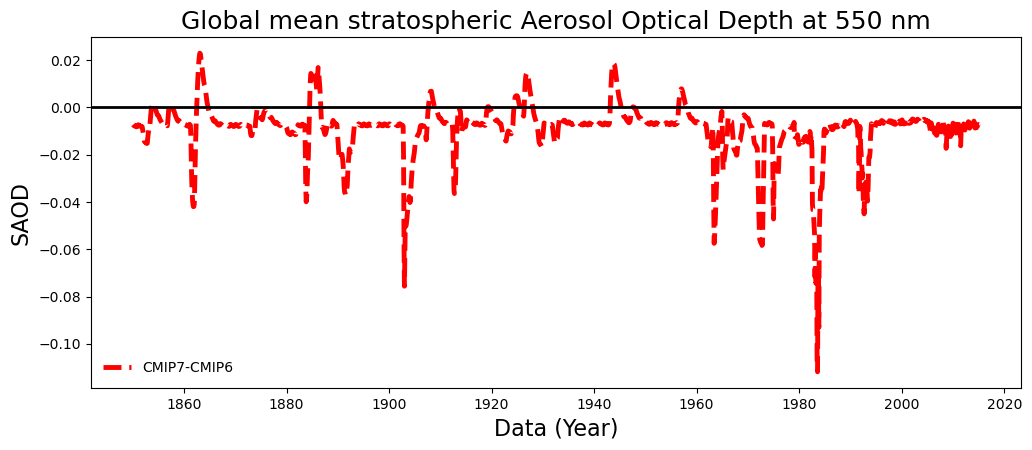

In [113]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

fig = plt.figure(figsize=(12, 12), dpi=100)
gs = gridspec.GridSpec(5, 2)

ax = fig.add_subplot(gs[0:2,:])

ax.plot(dates_cmip6, ds[8].data[1200:3180]-aod550nm_glb.data, 'r--', linewidth=3.5)  # Use dates here

# Add a horizontal line at y = 0
ax.axhline(0, color='k', linewidth=2)  # You can change color and linewidth as needed

ax.set_ylabel('SAOD', fontsize=16)
ax.set_xlabel('Data (Year)', fontsize=16)
ax.set_title('Global mean stratospheric Aerosol Optical Depth at 550 nm', fontsize=18)

plt.legend(['CMIP7-CMIP6'],loc='lower left', frameon=False)

Text(0.5, 1.0, 'SAOD Diff (CMIP7-CMIP6)')

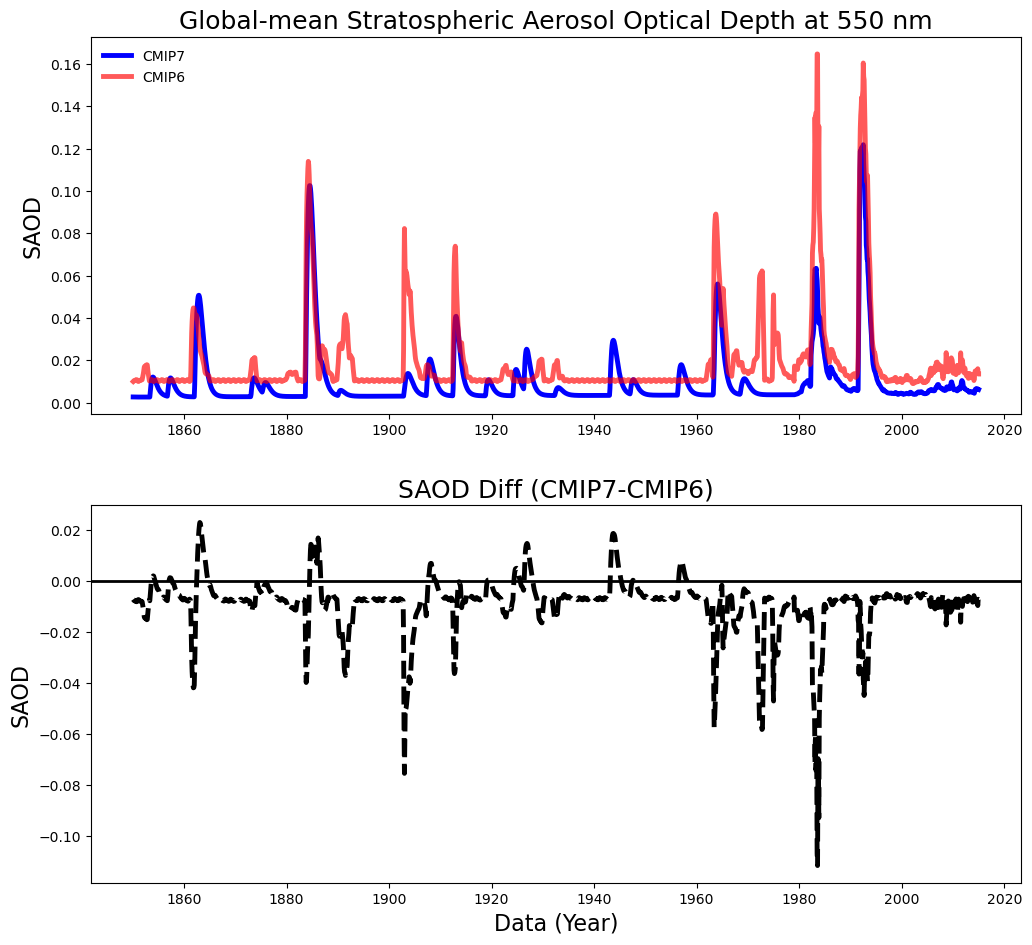

In [127]:
fig = plt.figure(figsize=(12, 12), dpi=100)
gs = gridspec.GridSpec(12, 2)

ax = fig.add_subplot(gs[0:5,:])


ax.plot(dates[1200:3180], ds[8].data[1200:3180], 'b', linewidth=3.5)  # Use dates here
ax.plot(dates_cmip6, aod550nm_glb.data, 'r',alpha=0.65, linewidth=3.5)  # Use dates here

ax.set_ylabel('SAOD', fontsize=16)
#ax.set_xlabel('Data (Year)', fontsize=16)
ax.set_title('Global-mean Stratospheric Aerosol Optical Depth at 550 nm', fontsize=18)

plt.legend(['CMIP7','CMIP6'],loc='upper left', frameon=False)

ax = fig.add_subplot(gs[6:11,:])

ax.plot(dates_cmip6, ds[8].data[1200:3180]-aod550nm_glb.data, 'k--', linewidth=3.5)  # Use dates here

# Add a horizontal line at y = 0
ax.axhline(0, color='k', linewidth=2)  # You can change color and linewidth as needed

ax.set_ylabel('SAOD', fontsize=16)
ax.set_xlabel('Data (Year)', fontsize=16)
ax.set_title('SAOD Diff (CMIP7-CMIP6)', fontsize=18)

#plt.legend(['CMIP7-CMIP6'],loc='lower left', frameon=False)

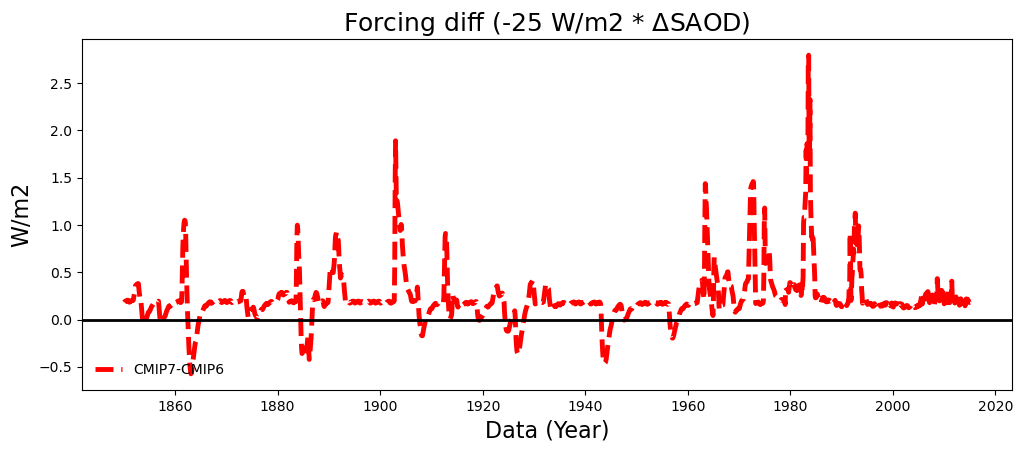

In [114]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

fig = plt.figure(figsize=(12, 12), dpi=100)
gs = gridspec.GridSpec(5, 2)

ax = fig.add_subplot(gs[0:2,:])

ax.plot(dates_cmip6, -25*(ds[8].data[1200:3180]-aod550nm_glb.data), 'r--', linewidth=3.5)  # Use dates here

# Add a horizontal line at y = 0
ax.axhline(0, color='k', linewidth=2)  # You can change color and linewidth as needed

ax.set_ylabel('W/m2', fontsize=16)
ax.set_xlabel('Data (Year)', fontsize=16)
ax.set_title('Forcing diff (-25 W/m2 * $\Delta$SAOD)', fontsize=18)

plt.legend(['CMIP7-CMIP6'],loc='lower left', frameon=False)

In [142]:
print(ds[5][5].shape)
print(ds[5][5][:,:,1200:3180])
print(aod550nm)

(70, 36, 3288)
Extinction / (unknown)              (altitude: 70; latitude: 36; Month from January 1750: 1980)
    Dimension coordinates:
        altitude                             x             -                            -
        latitude                             -             x                            -
        Month from January 1750              -             -                            x
    Scalar coordinates:
        Wavelength                  0.55
    Attributes:
        Unit                        '1/km'
        activity_id                 'input4MIPs'
        contact                     'CMIP7 Forcing Task Team: volcano dataset providers (thom.aubry@gmail.c ...'
        creation_date               '2024-07-07T14:58:58Z'
        data_specs_version          '01.00'
        dataset_category            'Stratospheric aerosol optical properties'
        frequency                   'Monthly'
        further_info_url            'Link to documentation to be added'
      

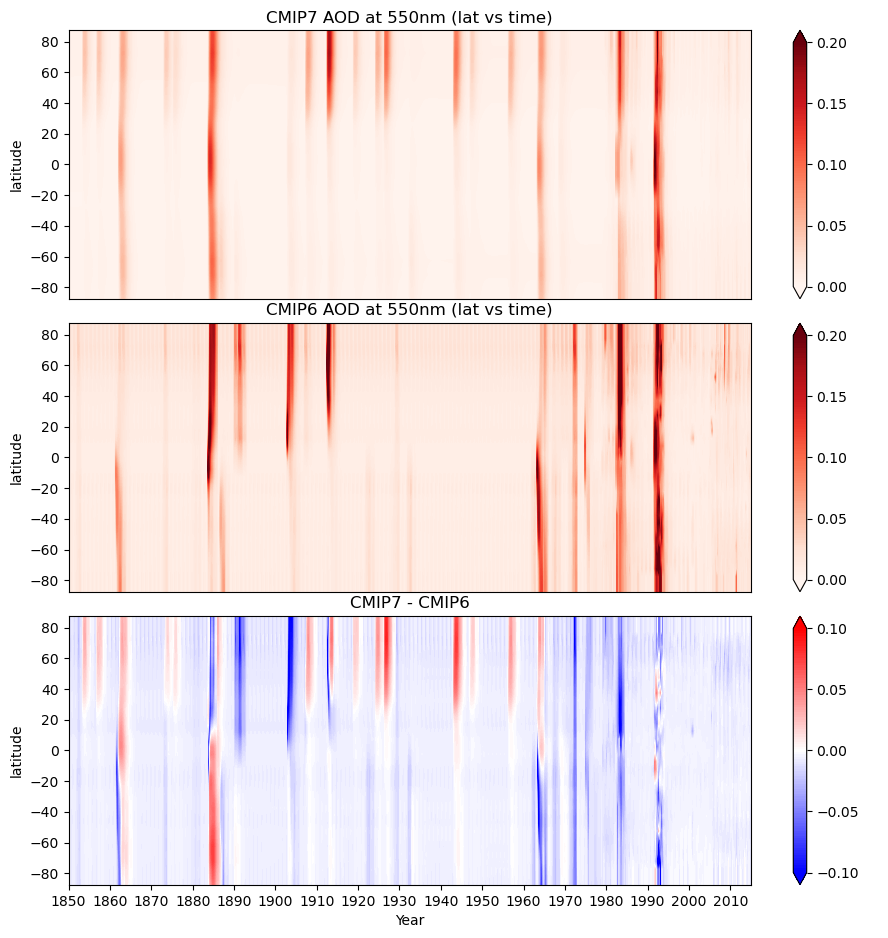

In [221]:
#compare cmip6 and cmip7 extinction at 550nm

#5: Extinction / (unknown)              
#(Wavelength: 23; altitude: 70; latitude: 36; Month from January 1750: 3288)

var_name = 'AOD'
unit_name = ' '

fig = plt.figure(figsize=(11, 13), dpi=100)
gs = gridspec.GridSpec(7, 2)

ax = fig.add_subplot(gs[0:2,:])

cube_time_lat_cmip7 = ds[5][5][:,:,1200:3180].copy().collapsed('altitude', nansum_aggregator)
cube_time_lat_cmip7 = 0.5 * cube_time_lat_cmip7 # each layer has 0.5km deepth

# Assuming cube_to_arrays is a function you have defined to transform your cube data
# into arrays that can be easily plotted with plt.contourf
X, Y, Z = cube_to_arrays(cube_time_lat_cmip7, 'Month from January 1750', 'latitude')  # Ensure the correct coord names are used

# Define the levels of the contour to be from -5 to 5, with a step that suits your data resolution (e.g., 0.5)
#levels = np.arange(-5, 5, 0.5)  # Adjust the step as needed for your specific data
contour_levels = np.linspace(0,0.2,100)

# Use the 'coolwarm' colormap, which transitions from blue to red
# And specify the levels in the contourf call to control the contour range
contour = plt.contourf(X, Y, Z, contour_levels, cmap="Reds", extend='both')  # Transpose Z to align dimensions

# Get current axes
ax = plt.gca()

ax.set_xticks([])  # This will not display any x-ticks

#ax.set_ylim([1, 300])

plt.title('CMIP7 '+ var_name+' at 550nm (lat vs time)')
#plt.xlabel('Year')
plt.ylabel('latitude')
cbb1=plt.colorbar(contour, label=unit_name)
cbb1.set_ticks(np.linspace(0,0.2,5))

ax = fig.add_subplot(gs[2:4,:])

cube_time_lat_cmip6 = ds0[0][7].copy().collapsed('altitude', nansum_aggregator)
cube_time_lat_cmip6 = 0.5 * cube_time_lat_cmip6 # each layer has 0.5km deepth

# Assuming cube_to_arrays is a function you have defined to transform your cube data
# into arrays that can be easily plotted with plt.contourf
X, Y, Z = cube_to_arrays(cube_time_lat_cmip6, 'month', 'latitude')  # Ensure the correct coord names are used

# Define the levels of the contour to be from -5 to 5, with a step that suits your data resolution (e.g., 0.5)
#levels = np.arange(-5, 5, 0.5)  # Adjust the step as needed for your specific data
#contour_levels = np.linspace(-4e-10,4e-10,100)

# Use the 'coolwarm' colormap, which transitions from blue to red
# And specify the levels in the contourf call to control the contour range
contour = plt.contourf(X, Y, Z, contour_levels, cmap="Reds", extend='both')  # Transpose Z to align dimensions

# Get current axes
ax = plt.gca()
ax.set_xticks([])  # This will not display any x-ticks

plt.title('CMIP6 '+ var_name+' at 550nm (lat vs time)')
plt.ylabel('latitude')
cbb1=plt.colorbar(contour, label=unit_name)
cbb1.set_ticks(np.linspace(0,0.2,5))


ax = fig.add_subplot(gs[4:6,:])

cube_diff = cube_time_lat_cmip6.copy(data= cube_time_lat_cmip7.data -cube_time_lat_cmip6.data)

# Assuming cube_to_arrays is a function you have defined to transform your cube data
# into arrays that can be easily plotted with plt.contourf
X, Y, Z = cube_to_arrays(cube_diff, 'month', 'latitude')  # Ensure the correct coord names are used

# Define the levels of the contour to be from -5 to 5, with a step that suits your data resolution (e.g., 0.5)
#levels = np.arange(-5, 5, 0.5)  # Adjust the step as needed for your specific data
contour_levels = np.linspace(-0.1,0.1,100)

# Use the 'coolwarm' colormap, which transitions from blue to red
# And specify the levels in the contourf call to control the contour range
contour = plt.contourf(X, Y, Z, contour_levels, cmap="bwr", extend='both')  # Transpose Z to align dimensions

# Get current axes
ax = plt.gca()

# Set x-ticks
#time_points = 
ax.set_xticks(cube_time_lat_cmip6.coord('month').points[::120])  # Every 12 months; adjust the slicing as needed
ax.set_xticklabels([date.year for date in dates_cmip6[::120]])

plt.title('CMIP7 - CMIP6')
plt.xlabel('Year')
plt.ylabel('latitude')
cbb1=plt.colorbar(contour, label=unit_name)
cbb1.set_ticks(np.linspace(-0.1,0.1,5))


### column integrated first, and then do the lat-time plot comparison
### Note that it is not an apple-to-apple comparison here: the CMIP6 provided extinction file has values under 10km (and quite large for major eruptions), whereas the CMIP7 provided exitinction file has masked out these values under the tropopause. (see also the height-time comparison plot)

In [184]:
print(cube_time_lat_cmip7.coord('latitude').points)
print(cube_time_lat_cmip6.coord('latitude').points)
print(ds[0].coord('altitude').points)
print(ds0[0].coord('altitude').points)

[-87.5 -82.5 -77.5 -72.5 -67.5 -62.5 -57.5 -52.5 -47.5 -42.5 -37.5 -32.5
 -27.5 -22.5 -17.5 -12.5  -7.5  -2.5   2.5   7.5  12.5  17.5  22.5  27.5
  32.5  37.5  42.5  47.5  52.5  57.5  62.5  67.5  72.5  77.5  82.5  87.5]
[-87.5 -82.5 -77.5 -72.5 -67.5 -62.5 -57.5 -52.5 -47.5 -42.5 -37.5 -32.5
 -27.5 -22.5 -17.5 -12.5  -7.5  -2.5   2.5   7.5  12.5  17.5  22.5  27.5
  32.5  37.5  42.5  47.5  52.5  57.5  62.5  67.5  72.5  77.5  82.5  87.5]
[ 5.   5.5  6.   6.5  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5
 12.  12.5 13.  13.5 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5
 19.  19.5 20.  20.5 21.  21.5 22.  22.5 23.  23.5 24.  24.5 25.  25.5
 26.  26.5 27.  27.5 28.  28.5 29.  29.5 30.  30.5 31.  31.5 32.  32.5
 33.  33.5 34.  34.5 35.  35.5 36.  36.5 37.  37.5 38.  38.5 39.  39.5]
[ 5.   5.5  6.   6.5  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5
 12.  12.5 13.  13.5 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5
 19.  19.5 20.  20.5 21.  21.5 22.  22.5 23.  23.5 24.  24.5 2

In [140]:
print(cube_time_lat_cmip6.shape)
print(cube_time_lat_cmip7.shape)


(36, 1980)
(36, 1980)


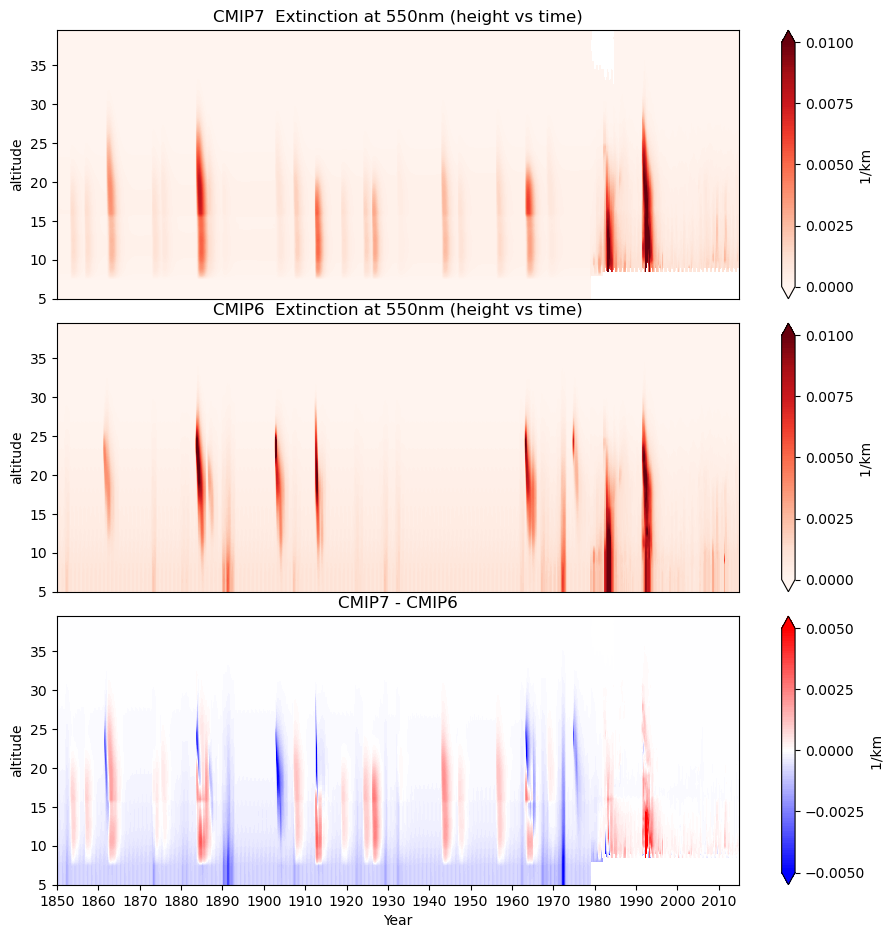

In [198]:
#compare cmip6 and cmip7 extinction at 550nm

#5: Extinction / (unknown)              
#(Wavelength: 23; altitude: 70; latitude: 36; Month from January 1750: 3288)

var_name = ' Extinction'
unit_name = '1/km '

fig = plt.figure(figsize=(11, 13), dpi=100)
gs = gridspec.GridSpec(7, 2)

ax = fig.add_subplot(gs[0:2,:])

cube_time_alt_cmip7 = ds[5][5][:,:,1200:3180].copy().collapsed('latitude', nanmean_aggregator)

# Assuming cube_to_arrays is a function you have defined to transform your cube data
# into arrays that can be easily plotted with plt.contourf
X, Y, Z = cube_to_arrays(cube_time_alt_cmip7, 'Month from January 1750', 'altitude')  # Ensure the correct coord names are used

# Define the levels of the contour to be from -5 to 5, with a step that suits your data resolution (e.g., 0.5)
#levels = np.arange(-5, 5, 0.5)  # Adjust the step as needed for your specific data
contour_levels = np.linspace(0,1e-2,100)

# Use the 'coolwarm' colormap, which transitions from blue to red
# And specify the levels in the contourf call to control the contour range
contour = plt.contourf(X, Y, Z, contour_levels, cmap="Reds", extend='both')  # Transpose Z to align dimensions

# Get current axes
ax = plt.gca()

ax.set_xticks([])  # This will not display any x-ticks

#ax.set_ylim([1, 300])

plt.title('CMIP7 '+ var_name+' at 550nm (height vs time)')
#plt.xlabel('Year')
plt.ylabel('altitude')
cbb1=plt.colorbar(contour, label=unit_name)
cbb1.set_ticks(np.linspace(0,1e-2,5))

ax = fig.add_subplot(gs[2:4,:])

cube_time_alt_cmip6 = ds0[0][7].copy().collapsed('latitude', nanmean_aggregator)

# Assuming cube_to_arrays is a function you have defined to transform your cube data
# into arrays that can be easily plotted with plt.contourf
X, Y, Z = cube_to_arrays(cube_time_alt_cmip6, 'month', 'altitude')  # Ensure the correct coord names are used

# Define the levels of the contour to be from -5 to 5, with a step that suits your data resolution (e.g., 0.5)
#levels = np.arange(-5, 5, 0.5)  # Adjust the step as needed for your specific data
#contour_levels = np.linspace(-4e-10,4e-10,100)

# Use the 'coolwarm' colormap, which transitions from blue to red
# And specify the levels in the contourf call to control the contour range
contour = plt.contourf(X, Y, Z, contour_levels, cmap="Reds", extend='both')  # Transpose Z to align dimensions

# Get current axes
ax = plt.gca()
ax.set_xticks([])  # This will not display any x-ticks

plt.title('CMIP6 '+ var_name+' at 550nm (height vs time)')
plt.ylabel('altitude')
cbb1=plt.colorbar(contour, label=unit_name)
cbb1.set_ticks(np.linspace(0,1e-2,5))


ax = fig.add_subplot(gs[4:6,:])

cube_diff = cube_time_alt_cmip6.copy(data= cube_time_alt_cmip7.data -cube_time_alt_cmip6.data)

# Assuming cube_to_arrays is a function you have defined to transform your cube data
# into arrays that can be easily plotted with plt.contourf
X, Y, Z = cube_to_arrays(cube_diff, 'month', 'altitude')  # Ensure the correct coord names are used

# Define the levels of the contour to be from -5 to 5, with a step that suits your data resolution (e.g., 0.5)
#levels = np.arange(-5, 5, 0.5)  # Adjust the step as needed for your specific data
contour_levels = np.linspace(-0.5e-2,0.5e-2,100)

# Use the 'coolwarm' colormap, which transitions from blue to red
# And specify the levels in the contourf call to control the contour range
contour = plt.contourf(X, Y, Z, contour_levels, cmap="bwr", extend='both')  # Transpose Z to align dimensions

# Get current axes
ax = plt.gca()

# Set x-ticks
#time_points = 
ax.set_xticks(cube_time_alt_cmip6.coord('month').points[::120])  # Every 12 months; adjust the slicing as needed
ax.set_xticklabels([date.year for date in dates_cmip6[::120]])

plt.title('CMIP7 - CMIP6')
plt.xlabel('Year')
plt.ylabel('altitude')
cbb1=plt.colorbar(contour, label=unit_name)
cbb1.set_ticks(np.linspace(-0.5e-2,0.5e-2,5))


### CMIP6 prescirbed extincting file still has large values under the tropopause, which is unreal. 
### Quote from their nc file notes: "The data is only valid above the tropopause.   The values with fill_flag=-1 were extrapolated from value at higher altutide and should not be used! " However, the fill_flag is not found within the file and cannot do a column-integrated calculation above the tropopause for SAOD.

In [202]:
ext550_cmip6 = ds0[0][7].copy()
# Check if 'fill_flag' exists and if it's a coordinate or an attribute
if 'fill_flag' in ext550_cmip6.coords():
    fill_flag = ext550_cmip6.coord('fill_flag').points
    mask = fill_flag == -1
elif 'fill_flag' in ext550_cmip6.attributes:
    # Handle case where it's an attribute, though this might be unusual for flags
    print("fill_flag is an attribute, not coordinate: ", ext550_cmip6.attributes['fill_flag'])
else:
    print("No fill_flag found in this cube.")

# If mask is created, apply it to cube data to mask out unwanted values
if 'mask' in locals():
    ext550_cmip6.data = ma.masked_where(mask, ext550_cmip6.data)

No fill_flag found in this cube.


### no fill_flag information in this data set

In [203]:
print(ext550_cmip6.attributes)

{'invalid_units': 'extinction coefficient of solar bands in 1/km', 'title': 'Surface aerea density of stratopheric aerosol,monthly mean        value', 'Institution_id': 'IACETH', 'Institution': 'Institute for Atmosphere and Climate, ETH Zurich, Switzerland', 'activity_id': 'input4CMIPs', 'Conventions': 'CF-1.6', 'data_structure': 'grid', 'frequency': 'month', 'creation_date': '20160531', 'source': 'SAGE, SAM, CALIPSO, OSIRIS, 2D-model-simulation and Photometer', 'source_id': 'SAGE CMIP', 'further_info_url': 'ftp://iacftp.ethz.ch/pub_read/luo/CMIP6/data_description.txt', 'contact': 'Beiping Luo: beiping.luo@env.ethz.ch or Larry Thomason:         l.w.thomason@nasa.gov', 'comment': 'We take only the sulfuric acid aerosol into account. The          PSCs are excluded. The data is only valid above the tropopause.   The values with fill_flag=-1 were extrapolated from value at      higher altutide and should not be used! '}


In [219]:
for cube in ds0:
    print(cube.name(), 'has _FillValue:', cube.attributes.get('_FillValue', 'No _FillValue attribute'))

ext_sun has _FillValue: No _FillValue attribute
wl1_sun has _FillValue: No _FillValue attribute
omega_sun has _FillValue: No _FillValue attribute
wl1_earth has _FillValue: No _FillValue attribute
wl2_earth has _FillValue: No _FillValue attribute
omega_earth has _FillValue: No _FillValue attribute
g_earth has _FillValue: No _FillValue attribute
wl2_sun has _FillValue: No _FillValue attribute
g_sun has _FillValue: No _FillValue attribute
ext_earth has _FillValue: No _FillValue attribute
